# TP 4 : Programmation dynamique

In [1]:
"""Open and read a KnapFile.

Args: \\
    - filename (String): the name of the file to read.

Returns: \\
    - price (Vector{Integer}): prices of items to put in the KnapSack. \\
    - weight (Vector{Integer}): weights of items to put in the KnapSack. \\
    - capacity (Integer): the maximum capacity of the KnapSack.
"""
function readKnapInstance(filename)
    price = []
    weight = []
    capacity = -1
    open(filename) do f
        for i = 1:3
            tok = split(readline(f))
            if (tok[1] == "ListPrices=")
                for i = 2:(length(tok)-1)
                    push!(price, parse(Int64, tok[i]))
                end
            elseif (tok[1] == "ListWeights=")
                for i = 2:(length(tok)-1)
                    push!(weight, parse(Int64, tok[i]))
                end
            elseif (tok[1] == "Capacity=")
                capacity = parse(Int64, tok[2])
            else
                println("Unknown read :", tok)
            end
        end
    end
    return price, weight, capacity
end

readKnapInstance

In [2]:
function analyseDynamique(price, weight, i, j)
    if i > 0
        C1, sol1 = analyseDynamique(price, weight, i - 1, j)
        if j - weight[i] >= 0
            C2, sol2 = analyseDynamique(price, weight, i - 1, j - weight[i])
            C2 += price[i]
            if C1 >= C2
                res = C1
                sol = push!(sol1, 0)
            else
                res = C2
                sol = push!(sol2, 1)
            end
        else
            res = C1
            sol = push!(sol1, 0)
        end
    else
        res = 0
        sol = Vector{Int8}()
    end
    
    return res, sol
end

analyseDynamique (generic function with 1 method)

In [3]:
price, weight, capacity = readKnapInstance("test2.opb")

res, sol = analyseDynamique(price, weight, length(price), capacity)

println(res)
println(sol)

2291
Int8[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]


In [ ]:
using Pkg
Pkg.add("GraphPlot")
Pkg.add("Graphs")
Pkg.add("SimpleWeightedGraphs")
using Graphs
using GraphPlot
using SimpleWeightedGraphs

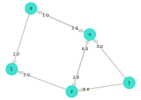

In [126]:
g = SimpleWeightedDiGraph(5)

add_edge!(g, 1, 2, 9)
add_edge!(g, 1, 3, 3)
add_edge!(g, 2, 3, 6)
add_edge!(g, 2, 5, 2)
add_edge!(g, 3, 4, 1)
add_edge!(g, 3, 2, 2)
add_edge!(g, 4, 3, 2)
add_edge!(g, 4, 5, 2)

nodelabel = 1:nv(g)
edgelabel = edges(g).iter.is[3]
gplot(g, nodelabel=nodelabel, edgelabel=edgelabel)

In [136]:
# https://en.wikipedia.org/wiki/Bellman%E2%80%93Ford_algorithm
function bellmanFord(graph, source)

    # Step 1: initialize graph
    d = fill(Inf, nv(graph)); # distance array
    p = fill(0, nv(graph)); # predecessor array
    d[source] = 0; # source's distance to source is null

    # Step 2: relax edges repeatedly
    for _ in 2:nv(graph)
        # println("test: ", k)
        for (v, u, w) in edges(graph).iter
            # println(u, " ", v, " ", w)
            if d[u] + w < d[v]
                d[v] = d[u] + w
                p[v] = u
            end
        end
    end

    # Step 3: check for negative-weight cycles
    for (v, u, w) in edges(graph).iter
        if d[u] + w < d[v]
            error("Graph contains a negative-weight cycle")
        end
    end

    return d, p
end
bellmanFord(g, 1)

([0.0, 5.0, 3.0, 4.0, 6.0], [0, 3, 1, 3, 4])